# Prediction with genetic algorithms and correction with probabilistic rules

This notebook gathers the results for the predictions made on the mono-objective genetic algorithms, considering a binary threshold of 100, and the later correction using probabilistic rules.

### Brief explanation

With the already chosen best models, we predicted hypometabolism for the patients in our database. By predicting each brain region independently, we created a whole brain map. However, and since variability was a big deal in some regions, we performed 10 predictions per region, which led to 10 different brain maps. For each of them, absolute and normalised rules were applied. Eventually, consensus brain maps were calculated before and after rule application. The relevance threshold, which determines how strict we are in considering rules, has been set as a parameter varying from 0.5 to 1.

### Import the packages

We import the packages that will be needed. In this case, everything is already contained in the prtools.py file.

In [1]:
import matplotlib
import seaborn
import warnings
import sys
sys.path.insert(0,'../../Tools')
from orderedlist import *
from prtools import *
da = Datasets()
ra = RuleApplication()

In [2]:
warnings.filterwarnings('ignore')
pandas.set_option('display.max_rows', None)
pandas.set_option('display.max_columns', None)
pandas.set_option('display.width', None)
pandas.set_option('display.max_colwidth', None)

### Preparation of results

#### General stuff

In [3]:
real_aal = da.define_binary(pandas.read_csv('../../Data/Y_aal_quan.csv'),100)
real_brodmann = da.define_binary(pandas.read_csv('../../Data/Y_brodmann_quan.csv'),100)
prediction_aal = pandas.read_csv('./Prediction_mono_100/Prediction/prediction_aal.csv')
prediction_brodmann = pandas.read_csv('./Prediction_mono_100/Prediction/prediction_brodmann.csv')

In [4]:
relevance_thresholds_absolute = [1,0.975,0.950,0.925,0.9,0.8,0.7,0.6,0.5]
relevance_thresholds_normalised = [0.9,0.8,0.7,0.6,0.5]

In [5]:
aal_list.remove('f1mo_l')
aal_list.remove('f1mo_r')

#### Absolute rules

In [6]:
comparison_absolute_aal = ra.compare_with_real(prediction_aal,real_aal)
comparison_absolute_brodmann = ra.compare_with_real(prediction_brodmann,real_brodmann)
index = ['Prediction']
for relevance_threshold in relevance_thresholds_absolute:
    absolute_aal = pandas.read_csv('./Prediction_mono_100/Absolute/correction_aal_'+str(relevance_threshold)+'.csv')
    absolute_brodmann = pandas.read_csv('./Prediction_mono_100/Absolute/correction_brodmann_'+str(relevance_threshold)+'.csv')
    comparison_absolute_aal = pandas.concat([comparison_absolute_aal,ra.compare_with_real(absolute_aal,real_aal)],axis=0)
    comparison_absolute_brodmann = pandas.concat([comparison_absolute_brodmann,ra.compare_with_real(absolute_brodmann,real_brodmann)],axis=0)
    index.append('Relevance threshold = '+str(relevance_threshold))
comparison_absolute_aal.index = index
comparison_absolute_brodmann.index = index

In [7]:
TFP_absolute_aal = comparison_absolute_aal[['TP','FP']].transpose()
TFP_absolute_brodmann = comparison_absolute_brodmann[['TP','FP']].transpose()
added_absolute_aal = []
added_absolute_brodmann = []
for relevance_threshold in relevance_thresholds_absolute:
        temp_TFP_aal = TFP_absolute_aal['Relevance threshold = '+str(relevance_threshold)]-TFP_absolute_aal['Prediction']
        temp_TFP_brodmann = TFP_absolute_brodmann['Relevance threshold = '+str(relevance_threshold)]-TFP_absolute_brodmann['Prediction']
        added_absolute_aal.append('With a relevance threshold of '+str(relevance_threshold)+', '+str(temp_TFP_aal[0]+temp_TFP_aal[1])+' regions were marked as hypometabolic: '+str(temp_TFP_aal[0])+' correctly ('+str(round(temp_TFP_aal[0]*100/(temp_TFP_aal[0]+temp_TFP_aal[1]),2))+' %) and '+str(temp_TFP_aal[1])+' incorrectly')
        added_absolute_brodmann.append('With a relevance threshold of '+str(relevance_threshold)+', '+str(temp_TFP_brodmann[0]+temp_TFP_brodmann[1])+' regions were marked as hypometabolic: '+str(temp_TFP_brodmann[0])+' correctly ('+str(round(temp_TFP_brodmann[0]*100/(temp_TFP_brodmann[0]+temp_TFP_brodmann[1]),2))+' %) and '+str(temp_TFP_brodmann[1])+' incorrectly')

In [8]:
correct_absolute_aal_regions = pandas.DataFrame()
percentage_absolute_aal_regions = pandas.DataFrame()
for task in aal_list:
    try:
        corrects = []
        percentages = []
        to_compare = ra.compare_with_real(prediction_aal[[task]],real_aal[[task]])
        for relevance_threshold in relevance_thresholds_absolute:
            absolute_aal = pandas.read_csv('./Prediction_mono_100/Absolute/correction_aal_'+str(relevance_threshold)+'.csv')
            compare_to = ra.compare_with_real(absolute_aal[[task]],real_aal[[task]])
            correct = int(compare_to['TP']-to_compare['TP'])
            incorrect = int(compare_to['FP']-to_compare['FP'])
            try: percentage = round(float(correct/(correct+incorrect)),2)
            except: percentage = numpy.nan
            corrects.append(correct)
            percentages.append(percentage)
        temp_corrects = pandas.DataFrame({task:corrects})
        temp_percentages = pandas.DataFrame({task:percentages})
        try: correct_absolute_aal_regions = pandas.concat([correct_absolute_aal_regions,temp_corrects],axis=1)
        except: correct_absolute_aal_regions = temp_corrects
        try: percentage_absolute_aal_regions = pandas.concat([percentage_absolute_aal_regions,temp_percentages],axis=1)
        except: percentage_absolute_aal_regions = temp_percentages
    except: pass
correct_absolute_aal_regions.index = relevance_thresholds_absolute
percentage_absolute_aal_regions.index = relevance_thresholds_absolute

In [9]:
correct_absolute_brodmann_regions = pandas.DataFrame()
percentage_absolute_brodmann_regions = pandas.DataFrame()
for task in brodmann_list:
    try:
        to_compare = ra.compare_with_real(prediction_brodmann[[task]],real_brodmann[[task]])
        corrects = []
        percentages = []
        for relevance_threshold in relevance_thresholds_absolute:
            absolute_brodmann = pandas.read_csv('./Prediction_mono_100/Absolute/correction_brodmann_'+str(relevance_threshold)+'.csv')
            compare_to = ra.compare_with_real(absolute_brodmann[[task]],real_brodmann[[task]])
            correct = int(compare_to['TP']-to_compare['TP'])
            incorrect = int(compare_to['FP']-to_compare['FP'])
            try: percentage = round(float(correct/(correct+incorrect)),2)
            except: percentage = numpy.nan
            corrects.append(correct)
            percentages.append(percentage)
        temp_corrects = pandas.DataFrame({task:corrects})
        temp_percentages = pandas.DataFrame({task:percentages})
        try: correct_absolute_brodmann_regions = pandas.concat([correct_absolute_brodmann_regions,temp_corrects],axis=1)
        except: correct_absolute_brodmann_regions = temp_corrects
        try: percentage_absolute_brodmann_regions = pandas.concat([percentage_absolute_brodmann_regions,temp_percentages],axis=1)
        except: percentage_absolute_brodmann_regions = temp_percentages
    except:pass
correct_absolute_brodmann_regions.index = relevance_thresholds_absolute
percentage_absolute_brodmann_regions.index = relevance_thresholds_absolute

#### Normalised rules

In [10]:
comparison_normalised_aal = ra.compare_with_real(prediction_aal,real_aal)
comparison_normalised_brodmann = ra.compare_with_real(prediction_brodmann,real_brodmann)
index = ['Prediction']
for relevance_threshold in relevance_thresholds_normalised:
    normalised_aal = pandas.read_csv('./Prediction_mono_100/Normalised/correction_aal_'+str(relevance_threshold)+'.csv')
    normalised_brodmann = pandas.read_csv('./Prediction_mono_100/Normalised/correction_brodmann_'+str(relevance_threshold)+'.csv')
    comparison_normalised_aal = pandas.concat([comparison_normalised_aal,ra.compare_with_real(normalised_aal,real_aal)],axis=0)
    comparison_normalised_brodmann = pandas.concat([comparison_normalised_brodmann,ra.compare_with_real(normalised_brodmann,real_brodmann)],axis=0)
    index.append('Relevance threshold = '+str(relevance_threshold))
comparison_normalised_aal.index = index
comparison_normalised_brodmann.index = index

In [11]:
TFP_normalised_aal = comparison_normalised_aal[['TP','FP']].transpose()
TFP_normalised_brodmann = comparison_normalised_brodmann[['TP','FP']].transpose()
added_normalised_aal = []
added_normalised_brodmann = []
for relevance_threshold in relevance_thresholds_normalised:
        temp_TFP_aal = TFP_normalised_aal['Relevance threshold = '+str(relevance_threshold)]-TFP_normalised_aal['Prediction']
        temp_TFP_brodmann = TFP_normalised_brodmann['Relevance threshold = '+str(relevance_threshold)]-TFP_normalised_brodmann['Prediction']
        added_normalised_aal.append('With a relevance threshold of '+str(relevance_threshold)+', '+str(temp_TFP_aal[0]+temp_TFP_aal[1])+' regions were marked as hypometabolic: '+str(temp_TFP_aal[0])+' correctly ('+str(round(temp_TFP_aal[0]*100/(temp_TFP_aal[0]+temp_TFP_aal[1]),2))+' %) and '+str(temp_TFP_aal[1])+' incorrectly')
        added_normalised_brodmann.append('With a relevance threshold of '+str(relevance_threshold)+', '+str(temp_TFP_brodmann[0]+temp_TFP_brodmann[1])+' regions were marked as hypometabolic: '+str(temp_TFP_brodmann[0])+' correctly ('+str(round(temp_TFP_brodmann[0]*100/(temp_TFP_brodmann[0]+temp_TFP_brodmann[1]),2))+' %) and '+str(temp_TFP_brodmann[1])+' incorrectly')

In [12]:
correct_normalised_aal_regions = pandas.DataFrame()
percentage_normalised_aal_regions = pandas.DataFrame()
for task in aal_list:
    try:
        corrects = []
        percentages = []
        to_compare = ra.compare_with_real(prediction_aal[[task]],real_aal[[task]])
        for relevance_threshold in relevance_thresholds_normalised:
            normalised_aal = pandas.read_csv('./Prediction_mono_100/Normalised/correction_aal_'+str(relevance_threshold)+'.csv')
            compare_to = ra.compare_with_real(normalised_aal[[task]],real_aal[[task]])
            correct = int(compare_to['TP']-to_compare['TP'])
            incorrect = int(compare_to['FP']-to_compare['FP'])
            try: percentage = round(float(correct/(correct+incorrect)),2)
            except: percentage = numpy.nan
            corrects.append(correct)
            percentages.append(percentage)
        temp_corrects = pandas.DataFrame({task:corrects})
        temp_percentages = pandas.DataFrame({task:percentages})
        try: correct_normalised_aal_regions = pandas.concat([correct_normalised_aal_regions,temp_corrects],axis=1)
        except: correct_normalised_aal_regions = temp_corrects
        try: percentage_normalised_aal_regions = pandas.concat([percentage_normalised_aal_regions,temp_percentages],axis=1)
        except: percentage_normalised_aal_regions = temp_percentages
    except: pass
correct_normalised_aal_regions.index = relevance_thresholds_normalised
percentage_normalised_aal_regions.index = relevance_thresholds_normalised

In [13]:
correct_normalised_brodmann_regions = pandas.DataFrame()
percentage_normalised_brodmann_regions = pandas.DataFrame()
for task in brodmann_list:
    try:
        to_compare = ra.compare_with_real(prediction_brodmann[[task]],real_brodmann[[task]])
        corrects = []
        percentages = []
        for relevance_threshold in relevance_thresholds_normalised:
            normalised_brodmann = pandas.read_csv('./Prediction_mono_100/Normalised/correction_brodmann_'+str(relevance_threshold)+'.csv')
            compare_to = ra.compare_with_real(normalised_brodmann[[task]],real_brodmann[[task]])
            correct = int(compare_to['TP']-to_compare['TP'])
            incorrect = int(compare_to['FP']-to_compare['FP'])
            try: percentage = round(float(correct/(correct+incorrect)),2)
            except: percentage = numpy.nan
            corrects.append(correct)
            percentages.append(percentage)
        temp_corrects = pandas.DataFrame({task:corrects})
        temp_percentages = pandas.DataFrame({task:percentages})
        try: correct_normalised_brodmann_regions = pandas.concat([correct_normalised_brodmann_regions,temp_corrects],axis=1)
        except: correct_normalised_brodmann_regions = temp_corrects
        try: percentage_normalised_brodmann_regions = pandas.concat([percentage_normalised_brodmann_regions,temp_percentages],axis=1)
        except: percentage_normalised_brodmann_regions = temp_percentages
    except:pass
correct_normalised_brodmann_regions.index = relevance_thresholds_normalised
percentage_normalised_brodmann_regions.index = relevance_thresholds_normalised

#### Random rules

In [14]:
FN_aal = comparison_absolute_aal.loc['Prediction']['FN']
TFN_aal = comparison_absolute_aal.loc['Prediction']['FN'] + comparison_absolute_aal.loc['Prediction']['TN']
FN_brodmann = comparison_absolute_brodmann.loc['Prediction']['FN']
TFN_brodmann = comparison_absolute_brodmann.loc['Prediction']['FN'] + comparison_absolute_brodmann.loc['Prediction']['TN']
random_aal = str(round((FN_aal*100/TFN_aal),2))+' %'
random_brodmann = str(round((FN_brodmann*100/TFN_brodmann),2))+' %'

### Results

#### AAL atlas (90 regions)

##### Using random corrector

A program that randomly changes negative labels to positive labels in our predicted dataset would label correctly what percentage of values?

In [15]:
print(random_aal)

4.06 %


##### Using absolute rules

Down below we show the **metrics associated to both the predictions and later corrections through probabilistic rules**.

In [16]:
comparison_absolute_aal

,TP,TN,FP,FN,accuracy,f1,precision,recall
Prediction,2031,25118,1669,1062,0.909,0.598,0.549,0.657
Relevance threshold = 1,2051,25082,1705,1042,0.908,0.599,0.546,0.663
Relevance threshold = 0.975,2238,24417,2370,855,0.892,0.581,0.486,0.724
Relevance threshold = 0.95,2243,24412,2375,850,0.892,0.582,0.486,0.725
Relevance threshold = 0.925,2267,24323,2464,826,0.890,0.579,0.479,0.733
Relevance threshold = 0.9,2331,24072,2715,762,0.884,0.573,0.462,0.754
Relevance threshold = 0.8,2441,23267,3520,652,0.860,0.539,0.409,0.789
Relevance threshold = 0.7,2577,21911,4876,516,0.820,0.489,0.346,0.833
Relevance threshold = 0.6,2690,20053,6734,403,0.761,0.430,0.285,0.870
Relevance threshold = 0.5,2769,18693,8094,324,0.718,0.397,0.255,0.895


Down below we show the **effect that the application of rules have over the predicted brain map**.

In [17]:
for i in added_absolute_aal: print(i)

With a relevance threshold of 1, 56 regions were marked as hypometabolic: 20 correctly (35.71 %) and 36 incorrectly
With a relevance threshold of 0.975, 908 regions were marked as hypometabolic: 207 correctly (22.8 %) and 701 incorrectly
With a relevance threshold of 0.95, 918 regions were marked as hypometabolic: 212 correctly (23.09 %) and 706 incorrectly
With a relevance threshold of 0.925, 1031 regions were marked as hypometabolic: 236 correctly (22.89 %) and 795 incorrectly
With a relevance threshold of 0.9, 1346 regions were marked as hypometabolic: 300 correctly (22.29 %) and 1046 incorrectly
With a relevance threshold of 0.8, 2261 regions were marked as hypometabolic: 410 correctly (18.13 %) and 1851 incorrectly
With a relevance threshold of 0.7, 3753 regions were marked as hypometabolic: 546 correctly (14.55 %) and 3207 incorrectly
With a relevance threshold of 0.6, 5724 regions were marked as hypometabolic: 659 correctly (11.51 %) and 5065 incorrectly
With a relevance thresho

Down below we show the **effect that the application of rules have over each of the predicted regions**.

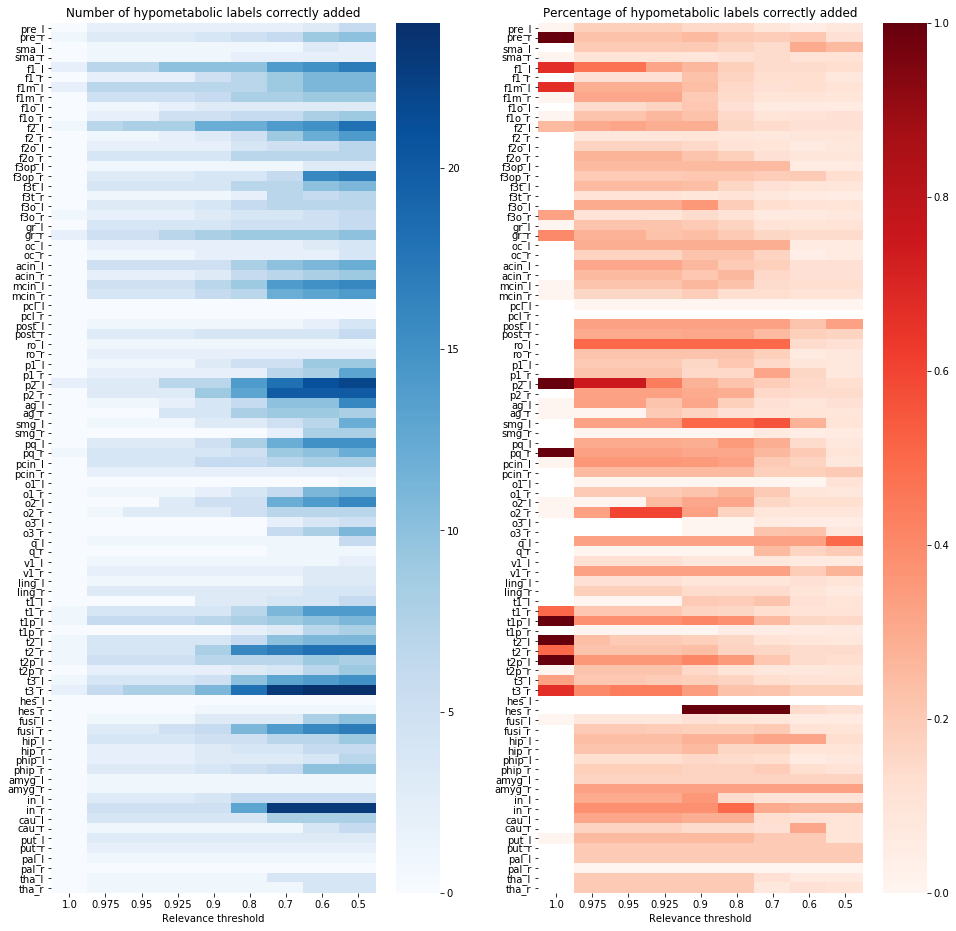

In [18]:
matplotlib.rcParams['figure.figsize'] = (16,16)
fig,ax =matplotlib.pyplot.subplots(1,2)
seaborn.heatmap(correct_absolute_aal_regions.transpose(),cmap='Blues',xticklabels=True,yticklabels=True,ax=ax[0])
ax[0].title.set_text('Number of hypometabolic labels correctly added')
ax[0].set_xlabel('Relevance threshold')
seaborn.heatmap(percentage_absolute_aal_regions.transpose(),cmap='Reds',xticklabels=True,yticklabels=True,ax=ax[1])
ax[1].title.set_text('Percentage of hypometabolic labels correctly added')
ax[1].set_xlabel('Relevance threshold')
fig.show()

##### Using normalised rules

Down below we show the **metrics associated to both the predictions and later corrections through probabilistic rules**.

In [19]:
comparison_normalised_aal

,TP,TN,FP,FN,accuracy,f1,precision,recall
Prediction,2031,25118,1669,1062,0.909,0.598,0.549,0.657
Relevance threshold = 0.9,2111,24895,1892,982,0.904,0.595,0.527,0.683
Relevance threshold = 0.8,2121,24875,1912,972,0.903,0.595,0.526,0.686
Relevance threshold = 0.7,2150,24746,2041,943,0.900,0.590,0.513,0.695
Relevance threshold = 0.6,2245,24219,2568,848,0.886,0.568,0.466,0.726
Relevance threshold = 0.5,2306,23780,3007,787,0.873,0.549,0.434,0.746


Down below we show the **effect that the application of rules have over the predicted brain map**.

In [20]:
for i in added_normalised_aal: print(i)

With a relevance threshold of 0.9, 303 regions were marked as hypometabolic: 80 correctly (26.4 %) and 223 incorrectly
With a relevance threshold of 0.8, 333 regions were marked as hypometabolic: 90 correctly (27.03 %) and 243 incorrectly
With a relevance threshold of 0.7, 491 regions were marked as hypometabolic: 119 correctly (24.24 %) and 372 incorrectly
With a relevance threshold of 0.6, 1113 regions were marked as hypometabolic: 214 correctly (19.23 %) and 899 incorrectly
With a relevance threshold of 0.5, 1613 regions were marked as hypometabolic: 275 correctly (17.05 %) and 1338 incorrectly


Down below we show the **effect that the application of rules have over each of the predicted regions**.

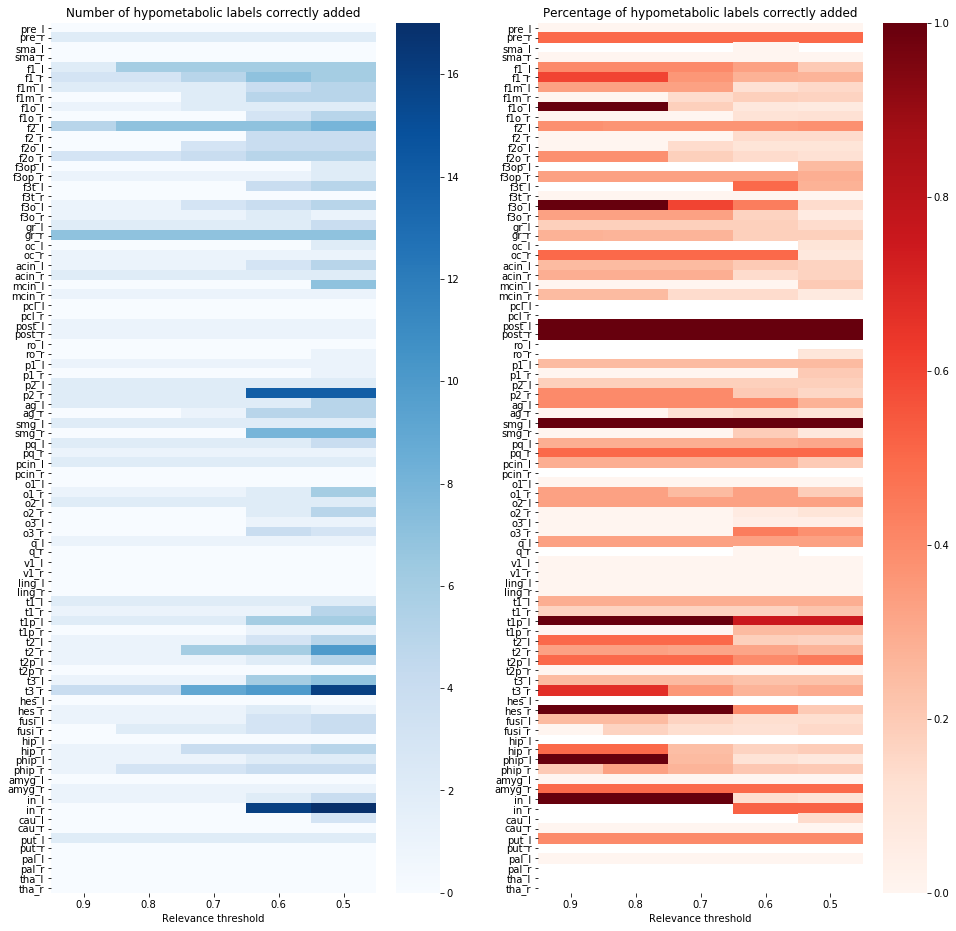

In [21]:
matplotlib.rcParams['figure.figsize'] = (16,16)
fig,ax =matplotlib.pyplot.subplots(1,2)
seaborn.heatmap(correct_normalised_aal_regions.transpose(),cmap='Blues',xticklabels=True,yticklabels=True,ax=ax[0])
ax[0].title.set_text('Number of hypometabolic labels correctly added')
ax[0].set_xlabel('Relevance threshold')
seaborn.heatmap(percentage_normalised_aal_regions.transpose(),cmap='Reds',xticklabels=True,yticklabels=True,ax=ax[1])
ax[1].title.set_text('Percentage of hypometabolic labels correctly added')
ax[1].set_xlabel('Relevance threshold')
fig.show()

#### Brodmann atlas (47 regions)

##### Using random corrector

A program that randomly changes negative labels to positive labels in our predicted dataset would label correctly what percentage of values?

In [22]:
print(random_brodmann)

2.97 %


##### Using absolute rules

Down below we show the **metrics associated to both the predictions and later corrections through probabilistic rules**.

In [23]:
comparison_absolute_brodmann

,TP,TN,FP,FN,accuracy,f1,precision,recall
Prediction,1035,13482,675,412,0.930,0.656,0.605,0.715
Relevance threshold = 1,1044,13472,685,403,0.930,0.657,0.604,0.721
Relevance threshold = 0.975,1087,13325,832,360,0.924,0.646,0.566,0.751
Relevance threshold = 0.95,1088,13320,837,359,0.923,0.645,0.565,0.752
Relevance threshold = 0.925,1091,13312,845,356,0.923,0.645,0.564,0.754
Relevance threshold = 0.9,1116,13248,909,331,0.921,0.643,0.551,0.771
Relevance threshold = 0.8,1166,12961,1196,281,0.905,0.612,0.494,0.806
Relevance threshold = 0.7,1214,12486,1671,233,0.878,0.560,0.421,0.839
Relevance threshold = 0.6,1247,12106,2051,200,0.856,0.526,0.378,0.862
Relevance threshold = 0.5,1279,11786,2371,168,0.837,0.502,0.350,0.884


Down below we show the **effect that the application of rules have over the predicted brain map**.

In [24]:
for i in added_absolute_brodmann: print(i)

With a relevance threshold of 1, 19 regions were marked as hypometabolic: 9 correctly (47.37 %) and 10 incorrectly
With a relevance threshold of 0.975, 209 regions were marked as hypometabolic: 52 correctly (24.88 %) and 157 incorrectly
With a relevance threshold of 0.95, 215 regions were marked as hypometabolic: 53 correctly (24.65 %) and 162 incorrectly
With a relevance threshold of 0.925, 226 regions were marked as hypometabolic: 56 correctly (24.78 %) and 170 incorrectly
With a relevance threshold of 0.9, 315 regions were marked as hypometabolic: 81 correctly (25.71 %) and 234 incorrectly
With a relevance threshold of 0.8, 652 regions were marked as hypometabolic: 131 correctly (20.09 %) and 521 incorrectly
With a relevance threshold of 0.7, 1175 regions were marked as hypometabolic: 179 correctly (15.23 %) and 996 incorrectly
With a relevance threshold of 0.6, 1588 regions were marked as hypometabolic: 212 correctly (13.35 %) and 1376 incorrectly
With a relevance threshold of 0.5,

Down below we show the **effect that the application of rules have over each of the predicted regions**.

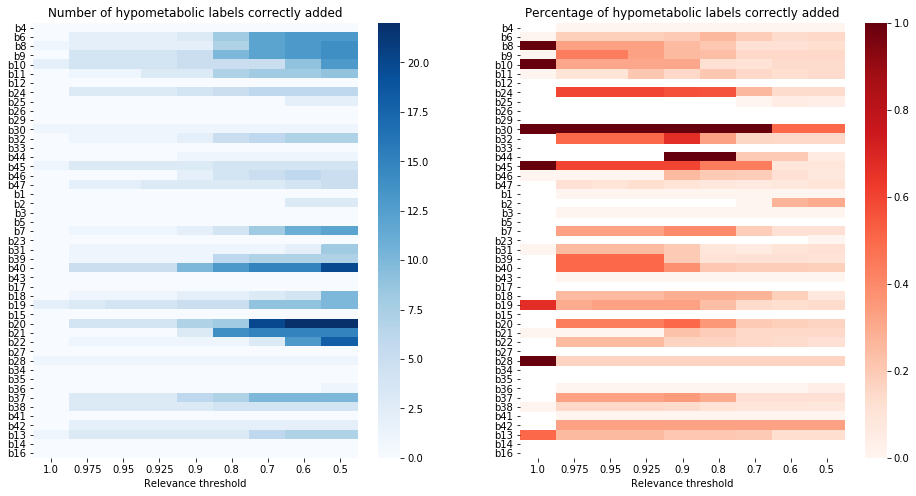

In [25]:
matplotlib.rcParams['figure.figsize'] = (16,8)
fig,ax =matplotlib.pyplot.subplots(1,2)
seaborn.heatmap(correct_absolute_brodmann_regions.transpose(),cmap='Blues',xticklabels=True,yticklabels=True,ax=ax[0])
ax[0].title.set_text('Number of hypometabolic labels correctly added')
ax[0].set_xlabel('Relevance threshold')
seaborn.heatmap(percentage_absolute_brodmann_regions.transpose(),cmap='Reds',xticklabels=True,yticklabels=True,ax=ax[1])
ax[1].title.set_text('Percentage of hypometabolic labels correctly added')
ax[1].set_xlabel('Relevance threshold')
fig.show()

##### Using normalised rules

Down below we show the **metrics associated to both the predictions and later corrections through probabilistic rules**.

In [26]:
comparison_normalised_brodmann

,TP,TN,FP,FN,accuracy,f1,precision,recall
Prediction,1035,13482,675,412,0.930,0.656,0.605,0.715
Relevance threshold = 0.9,1063,13431,726,384,0.929,0.657,0.594,0.735
Relevance threshold = 0.8,1065,13416,741,382,0.928,0.655,0.590,0.736
Relevance threshold = 0.7,1076,13374,783,371,0.926,0.651,0.579,0.744
Relevance threshold = 0.6,1121,13168,989,326,0.916,0.630,0.531,0.775
Relevance threshold = 0.5,1183,12829,1328,264,0.898,0.598,0.471,0.818


Down below we show the **effect that the application of rules have over the predicted brain map**.

In [27]:
for i in added_normalised_brodmann: print(i)

With a relevance threshold of 0.9, 79 regions were marked as hypometabolic: 28 correctly (35.44 %) and 51 incorrectly
With a relevance threshold of 0.8, 96 regions were marked as hypometabolic: 30 correctly (31.25 %) and 66 incorrectly
With a relevance threshold of 0.7, 149 regions were marked as hypometabolic: 41 correctly (27.52 %) and 108 incorrectly
With a relevance threshold of 0.6, 400 regions were marked as hypometabolic: 86 correctly (21.5 %) and 314 incorrectly
With a relevance threshold of 0.5, 801 regions were marked as hypometabolic: 148 correctly (18.48 %) and 653 incorrectly


Down below we show the **effect that the application of rules have over each of the predicted regions**.

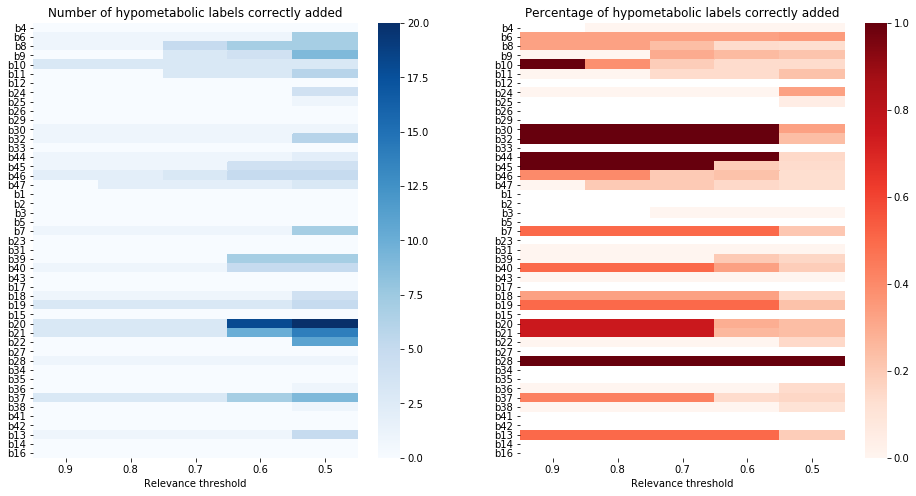

In [28]:
matplotlib.rcParams['figure.figsize'] = (16,8)
fig,ax =matplotlib.pyplot.subplots(1,2)
seaborn.heatmap(correct_normalised_brodmann_regions.transpose(),cmap='Blues',xticklabels=True,yticklabels=True,ax=ax[0])
ax[0].title.set_text('Number of hypometabolic labels correctly added')
ax[0].set_xlabel('Relevance threshold')
seaborn.heatmap(percentage_normalised_brodmann_regions.transpose(),cmap='Reds',xticklabels=True,yticklabels=True,ax=ax[1])
ax[1].title.set_text('Percentage of hypometabolic labels correctly added')
ax[1].set_xlabel('Relevance threshold')
fig.show()

### Conclusions

In order to measure the validity of our rules, it is important to know what result should we expect if we did random changes from negative labels to positive labels in our predicted datasets. As we have seen, it would be expected that only 3-4% of values are correctly labelled. This low percentage can be explained by two facts. First, the percentage of positive labels is by itself very low in the real dataset (10%). Second, our models have already predicted correctly part of this positive labels, which mean that only very few remain available for correction. Taking this into consideration, it is evident that **our rules perform better than a random generator would do**. Even so, **incorrect modifications are more common than correct modifications**, which explains why accuracy and precision always fall. Recall, on the other hand, can only improve. 

**As we consider lower relevance thresholds**, we allow more rules and more modifications to be considered. When the number of modifications is low, they tend to be more accurate; when the number of modifications is high, they tend to be less accurate. The consequence is that **recall increase while accuracy and precision decrease**. **As for the two different type of rules**, normalised rules result in less changes being made, which makes sense because we are being more strict. However, **absolute rules usually perform better at similar magnitudes**. The explanation is that normalised rules are very useful from the clinical point of view, but a pure data driven mechanism is expected to yield better metrics.

Eventually, if we focus in the correction region by region, it is clear that absolute rules will lead regions with already high levels of hypometabolism to show more changes. This explains why we see blocks where the rules appear to have a greater impact. In the other hand, normalised rules show more realistic relations. Looking at them, we can see that **certain regions appear to be more affected than others by the rules**; these are: P2 (L), T3 (R), IN (R), B20, B21, B22. To the moment we have only referred to the number of correct changes. In terms of percentage of correct changes, some regions that stand out are: PRE (R), F1 (R), F3O (L), POST (L), POST (R), SMG (L), T1P (L), T3 (R), HES (R), IN (L), B30, B32, B44, B45, B20, B21.

So, why are we struggling with correctly modifying non-hipometabolism to hipometabolism? 

- **Rules are very simple, which brings uncertainty**: in the rule '*if A is hypometabolic, then B is hypometabolic with a probability of 0.6*' we know the rule can be applied in 60% of cases but we don't know which cases they are; therefore, we may apply it when not needed or not apply it when needed.
- **We are in a very difficult scenario**: many positive labels have already been predicted correctly with our models, so what is left are the difficult cases. 
- **We are in a very unstable scenario**: the models predicted wrongly in some cases, so the rules are acting over uncertain prior knowledge.